<>:37: SyntaxWarning: invalid escape sequence '\s'
<>:37: SyntaxWarning: invalid escape sequence '\s'
C:\Users\BOK\AppData\Local\Temp\ipykernel_8996\4140065250.py:37: SyntaxWarning: invalid escape sequence '\s'
  bostonDF = pd.read_csv('https://raw.githubusercontent.com/YangGuiBee/ML/main/TextBook-04/housing.data.txt', header=None, sep='\s+')


       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9   0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   
10  0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311.0   
11  0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311.0   
12  0.09378  12.5   7.87 

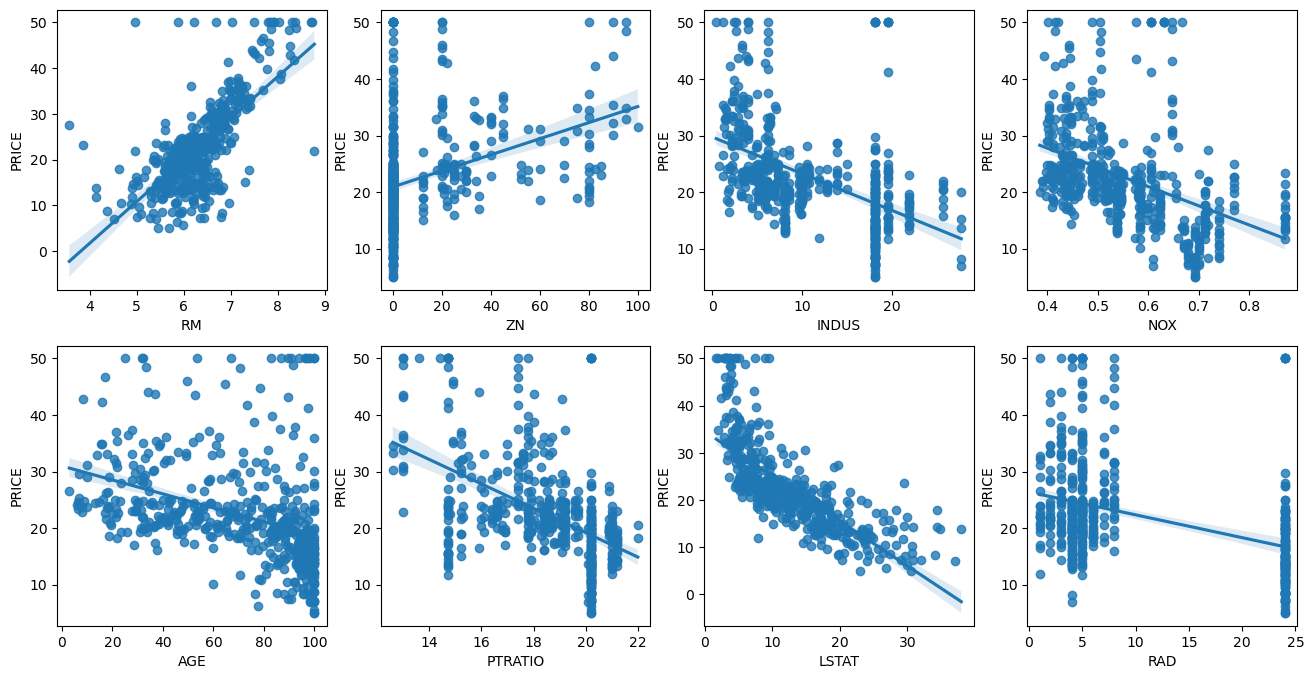

In [39]:
######################################################################################################
## 4강(추가) ## 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측을 위한 데이터 가져오기
######################################################################################################

# numpy 라이브러리 임포트 (수치 계산에 유용한 함수 제공)
import numpy as np
# pandas 라이브러리 임포트 (데이터프레임을 다루기 위해 사용)
import pandas as pd

# from sklearn.datasets import load_boston
# import warnings
# warnings.filterwarnings('ignore')  #사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거
# %matplotlib inline
# boston 데이타셋 로드
# boston = load_boston()
# boston 데이타셋 DataFrame 변환 
# bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# 각 컬럼별로 주택가격에 미치는 영향도를 조사
# CRIM: 지역별 범죄 발생률
# ZN: 25,000평방피트를 초과하는 거주 지역의 비율
# INDUS: 비상업 지역 넓이 비율
# CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
# NOX: 일산화질소 농도
# RM: 거주할 수 있는 방 개수
# AGE: 1940년 이전에 건축된 소유 주택의 비율
# DIS: 5개 주요 고용센터까지의 가중 거리
# RAD: 고속도로 접근 용이도
# TAX: 10,000달러당 재산세율
# PTRATIO: 지역의 교사와 학생 수 비율
# B: 지역의 흑인 거주 비율
# LSTAT: 하위 계층의 비율
# MEDV: 본인 소유의 주택 가격(중앙값)
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.

# 1. 데이터 불러오기
bostonDF = pd.read_csv('https://raw.githubusercontent.com/YangGuiBee/ML/main/TextBook-04/housing.data.txt', header=None, sep='\s+')

# 2. 컬럼 이름 설정
bostonDF.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# 3. PRICE라는 컬럼에 MEDV 값을 복사 (MEDV는 주택 가격을 나타냄)
bostonDF['PRICE'] = bostonDF['MEDV']

# 4. 데이터 확인
print(bostonDF.head(20))

# 5. 그래프로 확인
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    # regplot : 선형회귀선 그리기 
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])


In [99]:
######################################################################################################
## 4강(추가) ## LinearRegression : 학습과 테스트 데이터 세트로 분리하고 학습/예측/평가 수행
######################################################################################################

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

# 1. 데이터 불러오기
bostonDF = pd.read_csv('https://raw.githubusercontent.com/YangGuiBee/ML/main/TextBook-04/housing.data.txt', header=None, sep='\s+')
print('Boston 데이타셋 크기 :',bostonDF.shape)
# 2. 컬럼 이름 설정
bostonDF.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# 3. PRICE라는 컬럼에 MEDV 값을 복사 (MEDV는 주택 가격을 나타냄)
bostonDF['PRICE'] = bostonDF['MEDV']

y_target = bostonDF['PRICE']
# X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
X_data = bostonDF.drop(['PRICE', 'MEDV'], axis=1, inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

#Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))
print('회귀 계수값:', np.round(lr.coef_, 1))
print('절편 값:',np.round(lr.intercept_))

# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성하여 확인
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
C:\Users\BOK\AppData\Local\Temp\ipykernel_8996\3366455588.py:10: SyntaxWarning: invalid escape sequence '\s'
  bostonDF = pd.read_csv('https://raw.githubusercontent.com/YangGuiBee/ML/main/TextBook-04/housing.data.txt', header=None, sep='\s+')


Boston 데이타셋 크기 : (506, 14)
MSE : 17.297 , RMSE : 4.159
Variance score : 0.757
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]
절편 값: 41.0


RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

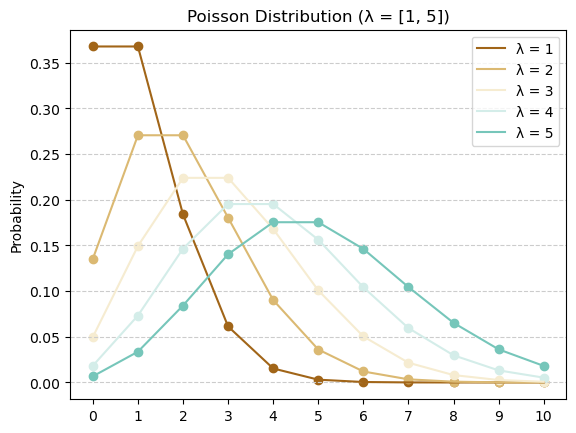

In [5]:
######################################################################################################
## 4강 ## 포아송 회귀 (Poisson Regression)
######################################################################################################

import numpy as np                      
# seaborn 라이브러리 임포트 (데이터 시각화 라이브러리)
import seaborn as sns                
# matplotlib의 pyplot 모듈 임포트 (그래프 그리기에 사용)
import matplotlib.pyplot as plt         
# scipy.stats에서 poisson 모듈 임포트 (포아송 분포 관련 함수 제공)
from scipy.stats import poisson          
# scipy.special에서 factorial 모듈 임포트 (팩토리얼 계산을 위한 함수 제공)
from scipy.special import factorial      

# 평균이 1인 포아송 분포에서 10개의 랜덤 샘플을 생성 (이 코드는 결과를 사용하지 않음)
poisson.rvs(mu=1, size=10)               

# seaborn의 "BrBG" 색상 팔레트에서 6개의 색을 선택 (그래프 색상에 사용)
pal_brbg = sns.color_palette("BrBG", 6)  

# 0부터 10까지의 정수 배열 생성 (x축 값, 즉 포아송 분포에서 발생 가능한 사건의 수)
x = np.arange(0, 11)                     

# λ 값을 1부터 5까지 반복하여 각각의 포아송 분포 그래프를 그림
for n_lambda in range(1, 6):             

		# 포아송 분포의 확률 계산: P(x; λ) = (e^(-λ) * λ^x) / x!
		y = np.exp(-n_lambda) * np.power(n_lambda, x) / factorial(x)  

		# 계산된 확률 y값을 x값에 대해 선 그래프로 그림, 각각 다른 색 사용
		plt.plot(x, y, color=pal_brbg[n_lambda - 1], label=f"λ = {n_lambda}")  

		# 해당 λ에 대한 확률 값을 점으로 표시
		plt.scatter(x, y, color=pal_brbg[n_lambda - 1])  

# y축 라벨 설정 (확률)
plt.ylabel("Probability")                
# 그래프 제목 설정 (λ 값의 범위 명시)
plt.title(f"Poisson Distribution (λ = [1, 5])")  
# x축에 0부터 10까지의 값 표시
plt.xticks(x)                            
# y축에 점선 스타일의 회색 그리드 추가 (가독성 향상)
plt.grid(axis="y", linestyle="--", color="#CCCCCC")  
# 그래프의 범례를 오른쪽 상단에 표시
plt.legend(loc="upper right")            
# 그래프를 화면에 출력
plt.show()                    




0.7902099128608198


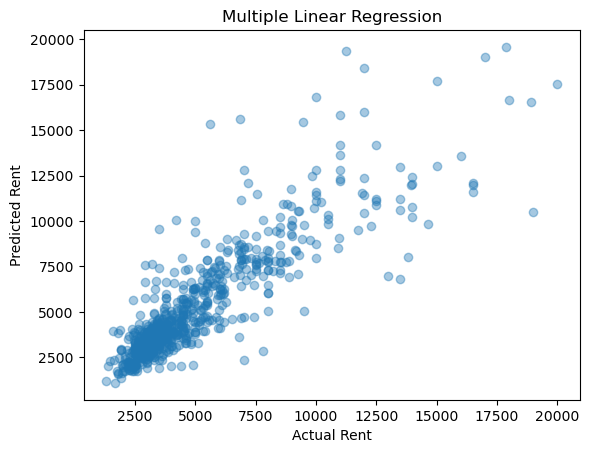

In [3]:
######################################################################################################
## 4강 ## 다중 회귀 (Multiple Regression)
######################################################################################################

import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 데이터 수집
df = pd.read_csv('https://raw.githubusercontent.com/YangGuiBee/ML/main/TextBook-04/manhattan.csv')
# 데이터 전처리(null겂이 많은 항목 삭제)
df = df.drop(['neighborhood','borough','rental_id'], axis=1)

X = df [['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
   	'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer',
'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio','has_gym']]
y = df [['rent']]       

# 데이터 구분 (학습데이터와 테스트 데이터 8:2)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2)
# 선형회귀모델 객체 생성
mlr = LinearRegression()
# 학습
mlr.fit(X_train, y_train)	
# 평가
print(mlr.score(X_train, y_train))
# 예측
y_predict = mlr.predict(X_test)

# 그래프 그리기
plt.scatter(y_test,y_predict,alpha=0.4)
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title('Multiple Linear Regression')
plt.show()

In [17]:
######################################################################################################
## 4강 ## 분위수 회귀 (Quantile Regression)
######################################################################################################
# 최초 한번 설치 필요
#!pip install dask[dataframe]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# statsmodels의 formula API에서 Quantile Regression 함수 임포트
import statsmodels.formula.api as smf
# sklearn 라이브러리에서 make_regression 함수 임포트 (회귀용 데이터 생성에 사용)
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
# MSE 평가를 위한 라이브러리 추가
from sklearn.metrics import mean_absolute_error

# 가상의 회귀용 데이터를 생성 (10000개의 샘플, 1개의 특성, 1개의 타겟 변수)
x, y = make_regression(n_samples=10000, n_features=1, n_informative=1, n_targets=1, random_state=42)

# 생성된 데이터를 DataFrame으로 변환
df = pd.DataFrame([x.reshape(-1), y.reshape(-1)]).T

# 컬럼 이름을 'distance'와 'time'으로 설정
df.columns = ['distance', 'time']

# 'distance' 컬럼에 노이즈를 추가하여 변형
df['distance'] = df['distance'].apply(lambda x: 10 + (x + np.random.normal()))

# 'time' 컬럼에 노이즈를 추가하여 변형 (기울기가 0.2인 선형 모델을 기반으로 함)
df['time'] = df['time'].apply(lambda x: 40 + 0.2 * (x + np.random.normal()))

# 데이터를 훈련 세트와 테스트 세트로 나눔 (90%는 훈련, 10%는 테스트)
train_x, test_x, train_y, test_y = train_test_split(df[['distance']], df[['time']], test_size=0.1, random_state=42)

# 훈련 데이터와 테스트 데이터의 크기 출력
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

# 모델 리스트와 예측값을 저장할 딕셔너리 초기화
model_list = []
pred_dict = {}

# 0.1, 0.5, 0.9 분위수를 사용하여 Quantile Regression 모델을 훈련 및 예측
# 0.1 분위수 : 하위 10% 지점, 0.5 분위수는 중앙값(중위수)으로 전체 데이터의 중간 지점, 0.9 분위수 : 상위 90% 지점에 해당하는 값
for quantile in [0.1, 0.5, 0.9]:
  # 훈련 데이터(거리와 시간)를 하나의 DataFrame으로 결합하여 초기화
  df = pd.concat([train_x, train_y], axis=1).reset_index(drop=True)

  # 분위수 회귀(Quantile Regression)를 수행하여 모델 피팅
  quantile_reg = smf.quantreg('time ~ distance', df).fit(q=quantile)

  # 테스트 데이터로 예측 수행
  pred = quantile_reg.predict(test_x)

  # 예측 결과를 분위수별로 저장
  pred_dict[quantile] = pred

# 테스트 데이터, 예측 결과, 실제 결과를 하나의 DataFrame으로 결합
pred_df = pd.concat([test_x.reset_index(drop=True), pd.DataFrame(pred_dict).reset_index(drop=True), test_y.reset_index(drop=True)], axis=1)

# 컬럼명 추가: distance, 0.1 분위수 예측값, 0.5 분위수 예측값, 0.9 분위수 예측값, 실제값(time)
pred_df.columns = ['distance', 'pred_0.1', 'pred_0.5', 'pred_0.9', 'actual']

# 평가 결과(MAE)를 출력하는 부분 추가 : 평가 결과는 0.1, 0.5, 0.9 분위수 각각에 대해 출력됨
for quantile in [0.1, 0.5, 0.9]:
    mae = mean_absolute_error(pred_df['actual'], pred_df[f'pred_{quantile}'])
    print(f'Mean Absolute Error (MAE) for quantile {quantile}: {mae:.4f}')







(9000, 1)
(9000, 1)
(1000, 1)
(1000, 1)
Mean Absolute Error (MAE) for quantile 0.1: 6.0876
Mean Absolute Error (MAE) for quantile 0.5: 3.5917
Mean Absolute Error (MAE) for quantile 0.9: 6.2897


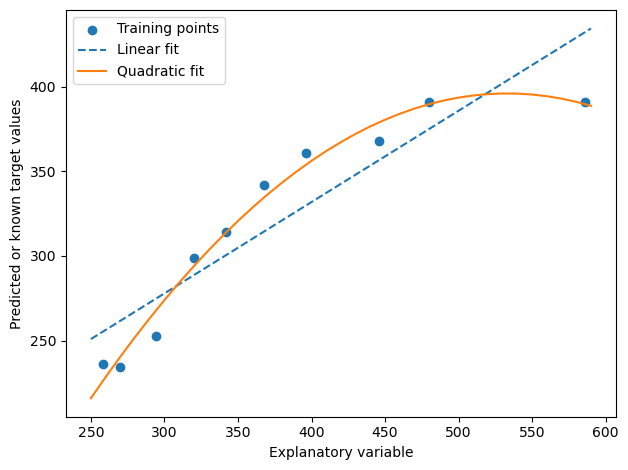

훈련 MSE 비교 - 선형 모델: 569.780, 다항 모델: 61.330
훈련 R^2 비교 - 선형 모델: 0.832, 다항 모델: 0.982


In [23]:
######################################################################################################
## 4강(추가) ## 다항 회귀 (Polynomial Regression) : 선형 회귀 모델을 다항 회귀로 변환
######################################################################################################

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = np.array([258.0, 270.0, 294.0,
              320.0, 342.0, 368.0,
              396.0, 446.0, 480.0, 586.0])\
             [:, np.newaxis]

y = np.array([236.4, 234.4, 252.8,
              298.6, 314.2, 342.2,
              360.8, 368.0, 391.2,
              390.8])

lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

# 선형 특성 학습
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# 이차항 특성 학습
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

# 결과 그래프
plt.scatter(X, y, label='Training points')
plt.plot(X_fit, y_lin_fit, label='Linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='Quadratic fit')
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

print('훈련 MSE 비교 - 선형 모델: %.3f, 다항 모델: %.3f' % (
        mean_squared_error(y, y_lin_pred),
        mean_squared_error(y, y_quad_pred)))
print('훈련 R^2 비교 - 선형 모델: %.3f, 다항 모델: %.3f' % (
        r2_score(y, y_lin_pred),
        r2_score(y, y_quad_pred)))

<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\BOK\AppData\Local\Temp\ipykernel_8996\3158061721.py:9: SyntaxWarning: invalid escape sequence '\s'
  header=None, sep='\s+')


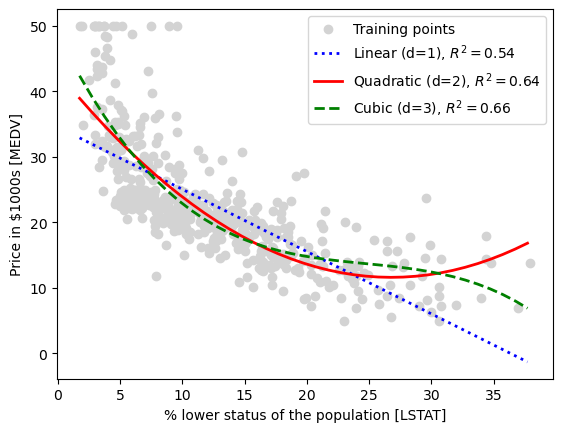

In [25]:
######################################################################################################
## 4강 ## 다항 회귀 (Polynomial Regression)
######################################################################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv('https://raw.githubusercontent.com/YangGuiBee/ML/main/TextBook-04/housing.data.txt',
                 header=None, sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',
              'NOX', 'RM', 'AGE', 'DIS', 'RAD',
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()

# 이차, 삼차 다항식 특성을 만듭니다
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# 학습된 모델을 그리기 위해 특성 범위를 만듭니다
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# 결과 그래프를 그립니다
plt.scatter(X, y, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit,
         label='Linear (d=1), $R^2=%.2f$' % linear_r2, color='blue', lw=2, linestyle=':')

plt.plot(X_fit, y_quad_fit,
         label='Quadratic (d=2), $R^2=%.2f$' % quadratic_r2, color='red', lw=2, linestyle='-')

plt.plot(X_fit, y_cubic_fit,
         label='Cubic (d=3), $R^2=%.2f$' % cubic_r2, color='green', lw=2, linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')

# plt.savefig('images/10_12.png', dpi=300)
plt.show()

In [97]:
######################################################################################################
## 4강(추가) ## 다항 회귀 (Polynomial Regression) : 다항 회귀를 이용한 보스턴 주택가격 예측
######################################################################################################

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

# boston 데이타셋 로드
# boston = load_boston()
# boston 데이타셋 DataFrame 변환 
# bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)
# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
# bostonDF['PRICE'] = boston.target

# 1. 데이터 불러오기
bostonDF = pd.read_csv('https://raw.githubusercontent.com/YangGuiBee/ML/main/TextBook-04/housing.data.txt', header=None, sep='\s+')

# 2. 컬럼 이름 설정
bostonDF.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# 3. PRICE라는 컬럼에 MEDV 값을 복사 (MEDV는 주택 가격을 나타냄)
bostonDF['PRICE'] = bostonDF['MEDV']
print('Boston 데이타셋 크기 :',bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE','MEDV'],axis=1,inplace=False)

# 학습 : 테스트 데이터 분리 7:3
X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

## Pipeline을 이용하여 PolynomialFeatures 변환과 LinearRegression 적용을 순차적으로 결합. 
p_model = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                  ('linear', LinearRegression())])
# 학습
p_model.fit(X_train, y_train)
# 예측
y_preds = p_model.predict(X_test)
# 평가
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))
print('회귀 계수값:', np.round(lr.coef_, 1))
print('절편 값:', np.round(lr.intercept_))


<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
C:\Users\BOK\AppData\Local\Temp\ipykernel_8996\3888769243.py:21: SyntaxWarning: invalid escape sequence '\s'
  bostonDF = pd.read_csv('https://raw.githubusercontent.com/YangGuiBee/ML/main/TextBook-04/housing.data.txt', header=None, sep='\s+')


Boston 데이타셋 크기 : (506, 15)
MSE : 15.556 , RMSE : 3.944
Variance score : 0.782
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]
절편 값: 41.0


(100, 1) (100, 1)


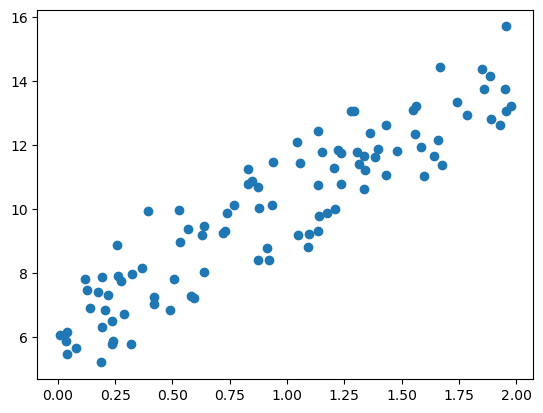

In [93]:
######################################################################################################
## 4강(추가:1/2) ## 경사하강법 (Gradient Descent) :  y = 4X + 6 식
######################################################################################################
# 실제값을 Y=4X+6 시뮬레이션하는 데이터 값 생성

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100,1)
y = 6 + 4 * X + np.random.randn(100,1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)
print(X.shape, y.shape)


w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


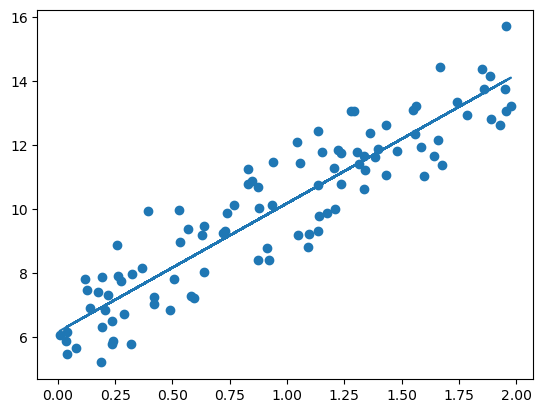

In [103]:
######################################################################################################
## 4강(추가:2/2) ## 경사하강법 (Gradient Descent) :  y = 4X + 6 식
######################################################################################################

# 1단계 : w_0과 w_1를 임의의 값으로 설정하고 첫 비용함수의 값을 계산
# 2단계 : w_1을 w_1 + 2/n합x(실제값-예측값)으로 업데이트 w_0을 w_0 +2/n합(실제값 - 예측값)으로 업데이트
# 3단계 : 2단계를 주어진 횟수만큼 반복
# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환.

# w0과 w1의 값을 최소화 할 수 있도록 업데이트 수행하는 함수 생성
# 예측 배열 y_pred는 np.dot(X, w1.T) + w0 임 100개의 데이터 X(1,2,...,100)이 있다면 
# 예측값은 w0 + X(1)w1 + X(2)w1 +..+ X(100)*w1이며, 
# 이는 입력 배열 X와 w1 배열의 내적임. 
# 새로운 w1과 w0를 update함 


def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    return w1_update, w0_update

w0 = np.zeros((1,1))
w1 = np.zeros((1,1))
y_pred = np.dot(X, w1.T) + w0
diff = y-y_pred
w0_factors = np.ones((100,1))
w1_update = -(2/100)*0.01*(np.dot(X.T, diff))
w0_update = -(2/100)*0.01*(np.dot(w0_factors.T, diff))

# 반복적으로 경사 하강법을 이용하여 get_weigth_updates()를 호출하여 w1과 w0를 업데이트 하는 함수 생성
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화.
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행.
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1, w0

#예측 오차 비용을 계산을 수행하는 함수 생성 및 경사 하강법 수행
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

plt.scatter(X, y)
plt.plot(X,y_pred)

In [105]:
######################################################################################################
## 4강(추가) ## 경사하강법 (Gradient Descent) : 미니 배치 확률적 경사 하강법
######################################################################################################

def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0

    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1, w0
np.random.permutation(100)    

w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


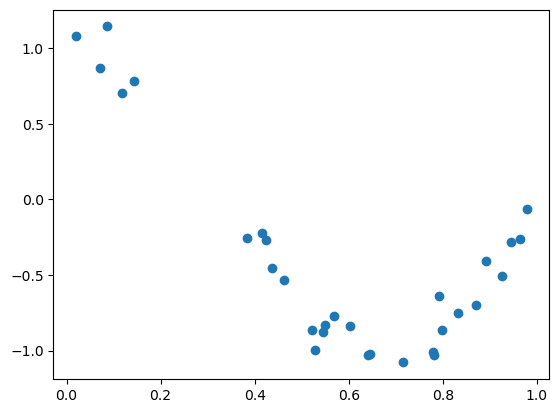

In [113]:
######################################################################################################
## 4강(추가:1/2) ## Polynomial Regression을 이용한 Underfitting, Overfitting 이해
######################################################################################################
# Degree가 클수록 복잡도 증가 = overfitting (과대적합) 학습데이터는 잘 맞아도, 테스트 데이터는 안맞을 가능성
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html
import numpy as np
import matplotlib.pyplot as plt

# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환. 
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이타 입니다.  
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값입니다. 
y = true_fun(X) + np.random.randn(n_samples) * 0.1
plt.scatter(X, y)


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98292000e+03  1.03899180e+05 -1.87415809e+06  2.03715961e+07
 -1.44873157e+08  7.09315008e+08 -2.47065753e+09  6.24561150e+09
 -1.15676562e+10  1.56895047e+10 -1.54006170e+10  1.06457389e+10
 -4.91378211e+09  1.35919860e+09 -1.70381087e+08] 입니다.
Degree 15 MSE 는 182493841.77 입니다.


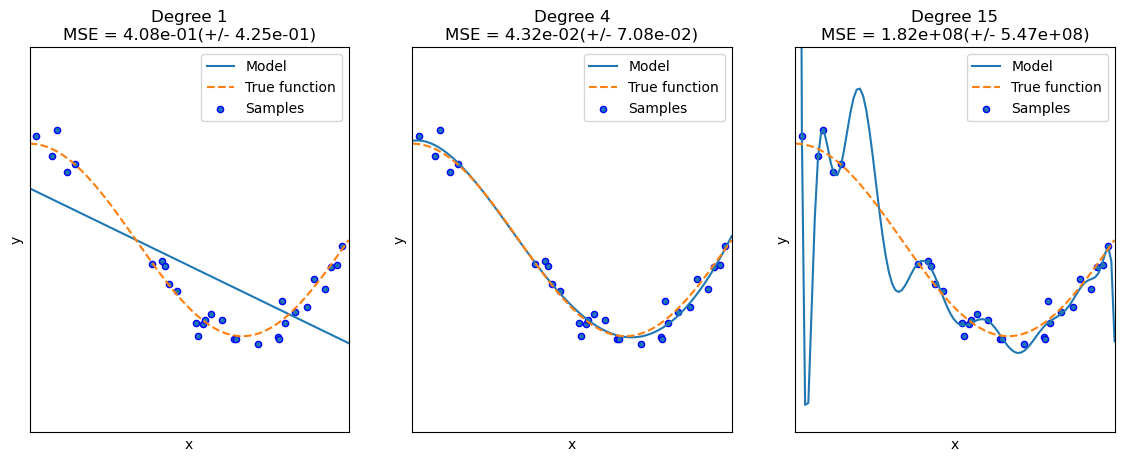

In [117]:
######################################################################################################
## 4강(추가:2/2) ## Polynomial Regression을 이용한 Underfitting, Overfitting 이해
######################################################################################################

import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\BOK\AppData\Local\Temp\ipykernel_8996\874123361.py:9: SyntaxWarning: invalid escape sequence '\s'
  bostonDF = pd.read_csv('https://raw.githubusercontent.com/YangGuiBee/ML/main/TextBook-04/housing.data.txt', header=None, sep='\s+')


alpha 0 일 때 5 folds 의 평균 RMSE : 5.829 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788 
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330 


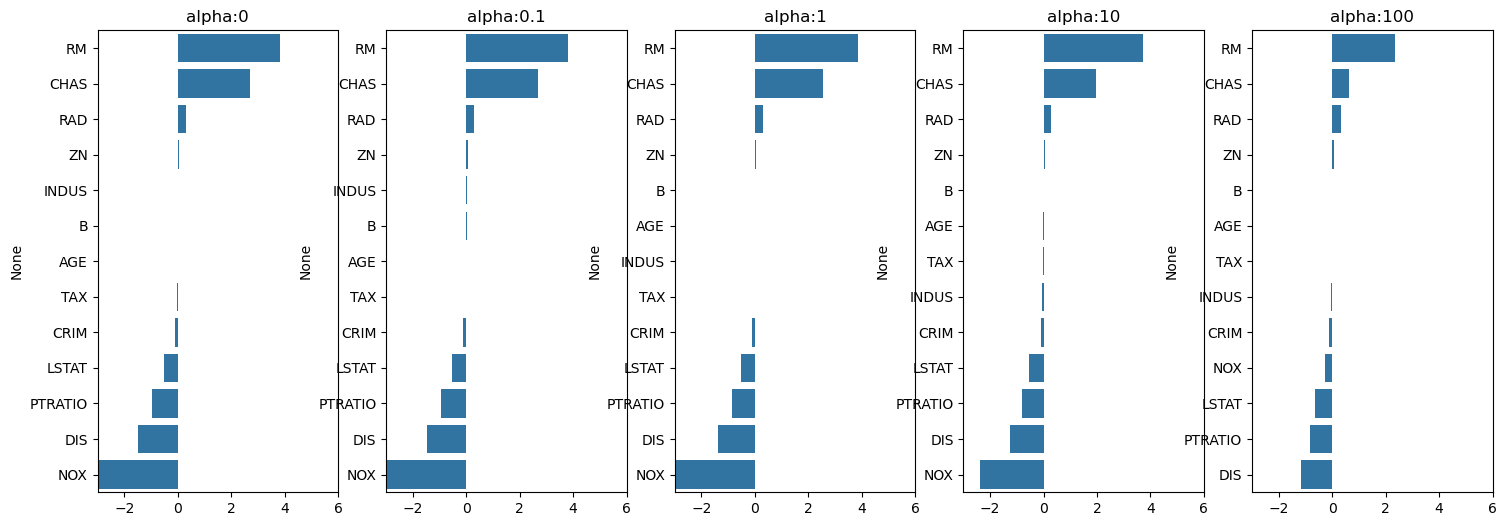

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


In [125]:
######################################################################################################
## 4강 ## Regularized Linear Models –Ridge Regression
######################################################################################################

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# 1. 데이터 불러오기
bostonDF = pd.read_csv('https://raw.githubusercontent.com/YangGuiBee/ML/main/TextBook-04/housing.data.txt', header=None, sep='\s+')

# 2. 컬럼 이름 설정
bostonDF.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# 3. PRICE라는 컬럼에 MEDV 값을 복사 (MEDV는 주택 가격을 나타냄)
bostonDF['PRICE'] = bostonDF['MEDV']

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE','MEDV'],axis=1,inplace=False)

# alpha값을 0 , 0.1 , 1 , 10 , 100 으로 변경하면서 RMSE 측정
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0 , 0.1 , 1 , 10 , 100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))


# 각 alpha에 따른 회귀 계수 값을 시각화. 각 alpha값 별로 plt.subplots로 맷플롯립 축 생성

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

# alpha 값에 따른 컬럼별 회귀계수 출력
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

In [135]:
######################################################################################################
## 4강 ## Regularized Linear Models –Lasso Regression
######################################################################################################

from sklearn.linear_model import Lasso

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
    
    return coeff_df
# end of get_linear_regre_eval

# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [133]:
######################################################################################################
## 4강 ## Regularized Linear Models –ElasticNet Regression
######################################################################################################

from sklearn.linear_model import ElasticNet

# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000
